In [187]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import tensorflow.keras.layers
from livelossplot import PlotLossesKeras

### Leitura dos dados

### Filtro

### Partilha

In [199]:
base_treino = pd.read_csv("src/base_treino.csv")
train_data = base_treino["texto"]
train_labels = base_treino["rotulo"]

# Hiperparâmetros

tammax = 100
batch_size = 256

In [200]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
train_labels_one_hot = to_categorical(train_labels, num_classes=6)
validation_labels_one_hot = to_categorical(validation_labels, num_classes=6)

In [202]:
layer_tokens = tensorflow.keras.layers.TextVectorization(
    output_mode="int",
    output_sequence_length=tammax,
    pad_to_max_tokens=True,
    max_tokens=20000,
)
layer_tokens.adapt(train_data)

model = tensorflow.keras.Sequential(
    [
        tensorflow.keras.Input(shape=(1,), dtype=tensorflow.string),
        layer_tokens,
        tensorflow.keras.layers.Embedding(
            input_dim=layer_tokens.vocabulary_size(), output_dim=32
        ),
        tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(8)),
        # tensorflow.keras.layers.LSTM(8),
        tensorflow.keras.layers.Dense(32, activation="relu"),
        tensorflow.keras.layers.Dropout(0.25),
        tensorflow.keras.layers.Dense(6, activation="sigmoid"),
    ]
)

model.compile(loss=["categorical_crossentropy"], optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_46 (Tex  (None, 100)               0         
 tVectorization)                                                 
                                                                 
 embedding_53 (Embedding)    (None, 100, 32)           640000    
                                                                 
 bidirectional_18 (Bidirect  (None, 16)                2624      
 ional)                                                          
                                                                 
 dense_93 (Dense)            (None, 32)                544       
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_94 (Dense)            (None, 6)               

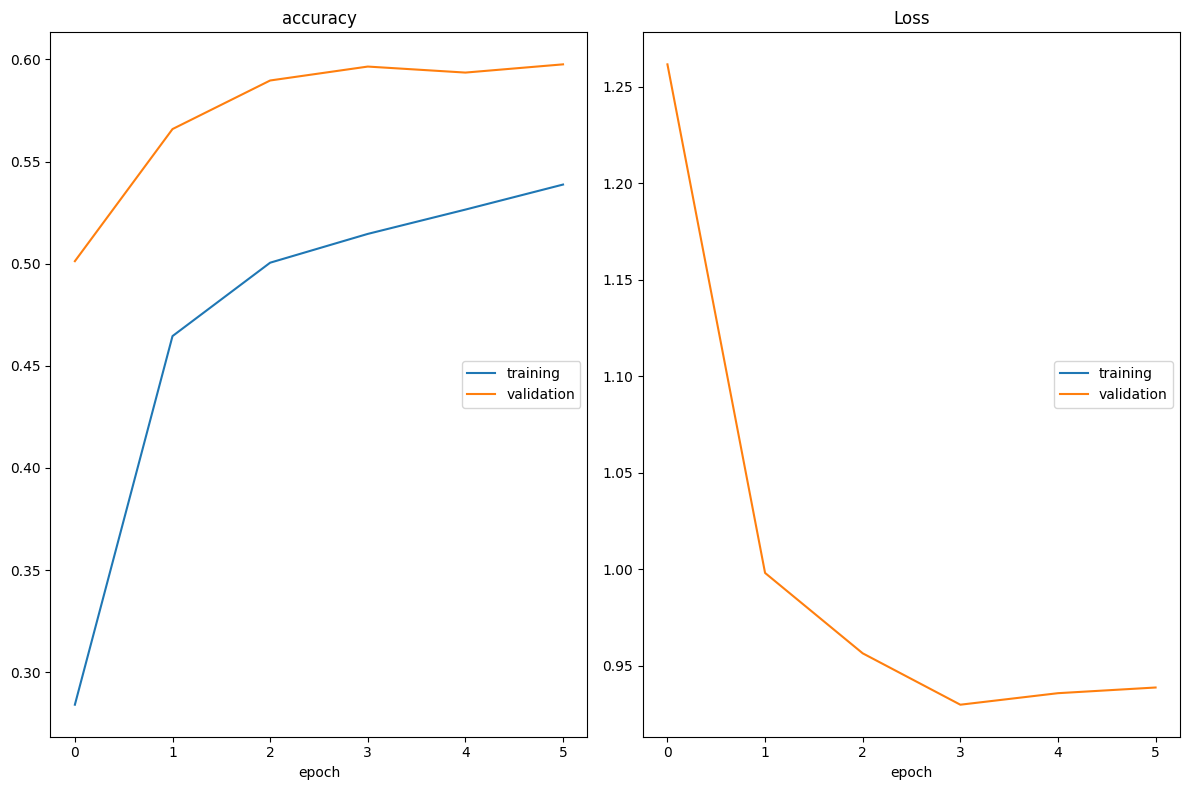

accuracy
	training         	 (min:    0.284, max:    0.539, cur:    0.539)
	validation       	 (min:    0.501, max:    0.598, cur:    0.598)
Loss
	training         	 (min:      nan, max:      nan, cur:      nan)
	validation       	 (min:    0.930, max:    1.262, cur:    0.939)
164/164 [==============================] - 14s 83ms/step - loss: nan - accuracy: 0.5387 - val_loss: 0.9388 - val_accuracy: 0.5976
Epoch 7/50
164/164 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5445

KeyboardInterrupt: 

In [198]:
base_validacao = pd.read_csv("src/base_validacao.csv")
validation_data = base_validacao["texto"]
validation_labels = base_validacao["rotulo"]

from tensorflow.keras.callbacks import LambdaCallback

save_last_epoch_plot_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: plot_losses.fig.savefig("last_epoch_plot.png")
    if logs.get("end")
    else None
)

model.fit(
    train_data,
    train_labels_one_hot,
    epochs=50,
    batch_size=batch_size,
    validation_data=(validation_data, validation_labels_one_hot),
    callbacks=[PlotLossesKeras(), save_last_epoch_plot_callback],
)

### Codifica

In [52]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers
from tensorflow.keras.optimizers import Adam

In [75]:
tf.keras.Input(shape=(1,), dtype=tf.string)

<KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_15')>

In [86]:
base_treino = pd.read_csv("src/base_treino.csv")
train_data = base_treino["texto"]
train_labels = base_treino["rotulo"]

model = tf.keras.Sequential(
    [
        ############ Seu código aqui##################
        tf.keras.Input(shape=(1,), dtype=tf.string),
        layer_tokens,
        tf.keras.layers.Embedding(
            input_dim=layer_tokens.vocabulary_size(), output_dim=50
        ),
        tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation="relu"),
    ]
)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
model.fit(train_data, train_labels, epochs=20)

Epoch 1/20
2623/2623 [==============================] - 24s 9ms/step - loss: -32.7687 - binary_accuracy: 0.1840
Epoch 2/20
2623/2623 [==============================] - 23s 9ms/step - loss: -34.8279 - binary_accuracy: 0.1911
Epoch 3/20
2623/2623 [==============================] - 23s 9ms/step - loss: -34.8293 - binary_accuracy: 0.1911
Epoch 4/20
2623/2623 [==============================] - 24s 9ms/step - loss: -34.8294 - binary_accuracy: 0.1911
Epoch 5/20
2623/2623 [==============================] - 23s 9ms/step - loss: -34.8293 - binary_accuracy: 0.1911
Epoch 6/20
2623/2623 [==============================] - 24s 9ms/step - loss: -34.8293 - binary_accuracy: 0.1911
Epoch 7/20
2623/2623 [==============================] - 24s 9ms/step - loss: -34.8293 - binary_accuracy: 0.1911
Epoch 8/20
2623/2623 [==============================] - 24s 9ms/step - loss: -34.8293 - binary_accuracy: 0.1911
Epoch 9/20
2623/2623 [==============================] - 24s 9ms/step - loss: -34.8294 - binary_accuracy:

In [63]:
layer_tokens = tf.keras.layers.TextVectorization(
    output_mode="int",
    output_sequence_length=100,
)
layer_tokens.adapt(train_data)
layer_tokens.vocabulary_size()
# model = Sequential()
# model.add(Embedding(1000, 64))

52172

In [ ]:

def create_model(embedding_layer, rnn_layer, num_classes, dropout_rate=0.0):
    model = Sequential()
    model.add(model_embedding)
    model.add(rnn_layer)
    model.add(Dense(num_classes, activation="softmax"))
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))

    return model


# Hiperparâmetros
tammax = 50  # Tamanho máximo de palavras na sentença
vocab_size = 20000  # Tamanho do vocabulário
embedding_dim = 100  # Dimensão do embedding
batch_size = 32  # Tamanho do batch
num_classes = 10  # Número de classes
dropout_rates = [0.0, 0.25, 0.5]  # Taxas de dropout para experimentar

# Hiperparâmetros
# tammax = 10  # Tamanho máximo de palavras na sentença
# vocab_size = 20000  # Tamanho do vocabulário
# embedding_dim = 100  # Dimensão do embedding
# batch_size = 32  # Tamanho do batch
# epochs = 10  # Número de épocas

layer_tokens = tf.keras.layers.TextVectorization(
    output_mode="int",
    output_sequence_length=100,
)
layer_tokens.adapt(train_data)


model = Sequential()
model.add(embedding_layer)
model.add(rnn_layer)
model.add(Dense(num_classes, activation="softmax"))


In [47]:
from tensorflow.keras.datasets import imdb

num_words = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 1s 0us/step


In [51]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [45]:
model = Sequential()

layer_tokens = tf.keras.layers.TextVectorization(
    output_mode="int",
    output_sequence_length=100,
)
layer_tokens.adapt(train_data)

embedding = tf.keras.layers.Embedding(
    input_dim=layer_tokens.vocabulary_size(), output_dim=50
)
model.add(embedding)
model.add(LSTM(128, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(1, activation="sigmoid"))
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

early_stopper = EarlyStopping(monitor="val_acc", min_delta=0.0005, patience=3)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=2, cooldown=0)

callbacks = [reduce_lr, early_stopper]

train_history = model.fit(
    X_train_seq,
    y_train_transformed,
    batch_size=batch_size,
    epochs=5,
    validation_split=0.1,
    verbose=1,
    callbacks=callbacks,
)


# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=(1,), dtype=tf.string),
#         layer_tokens,
#         tf.keras.layers.Embedding(
#             input_dim=layer_tokens.vocabulary_size(), output_dim=50
#         ),
#         tf.keras.layers.Embedding(
#             input_dim=layer_tokens.vocabulary_size(), output_dim=50
#         ),
#     ]
# )

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, None, 50)          2608600   
                                                                 
 lstm_17 (LSTM)              (None, 128)               91648     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2700377 (10.30 MB)
Trainable params: 2700377 (10.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
